powlaw1d.pow1
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   pow1.gamma   thawed      2.04624          -10           10           
   pow1.ref     frozen         4000 -3.40282e+38  3.40282e+38           
   pow1.ampl    thawed      4.35148            0  3.40282e+38           
Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 21507.6
Final fit statistic   = 20230.3 at function evaluation 10
Data points           = 983
Degrees of freedom    = 981
Probability [Q-value] = 0
Reduced statistic     = 20.6221
Change in statistic   = 1277.26
   pow1.gamma     1.98798      +/- 0.00353283  
   pow1.ampl      4.42533      +/- 0.00301925  
datasets       = (1,)
itermethodname = none
methodname     = levmar
statname       = chi2
succeeded      = True
parnames       = ('pow1.gamma', 'pow1.ampl')
parvals        = (1.9879766845874614, 4.425327

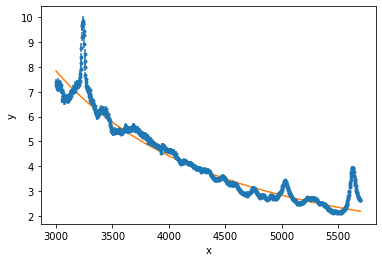

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sherpa.ui as ui

#loading data
from astropy.extern.six.moves.urllib import request
url = 'http://python4astronomers.github.com/_downloads/3c273.fits'
open('3c273.fits', 'wb').write(request.urlopen(url).read())

from astropy.io import fits
dat = fits.open('3c273.fits')[1].data
wlen = dat.field('WAVELENGTH')
flux = dat.field('FLUX')
ui.load_arrays(1, wlen, flux)

(ui.get_data().x)
(ui.get_data().y)
#rescaling data
d1 = ui.get_data()
d1.y *= 1e14

d1.staterror == None
True
ui.set_staterror(0.02, fractional=True)
d1.staterror == None
False

#filtering/plotting data
ui.notice(3000, 5700)
ui.plot_data()

#fitting continuum
ui.set_source(ui.powlaw1d.pow1)
pow1.ref = 4000.0
print(pow1)

#checking statistics
ui.get_stat()
ui.get_stat_name()

#plotting fit
ui.fit()
ui.plot_fit()

#viewing results
results = ui.get_fit_results()
print(results)


powlaw1d.pow1
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   pow1.gamma   thawed      1.90087          -10           10           
   pow1.ref     frozen         4000 -3.40282e+38  3.40282e+38           
   pow1.ampl    thawed       4.0954            0  3.40282e+38           
Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 32374.3
Final fit statistic   = 20230.3 at function evaluation 10
Data points           = 983
Degrees of freedom    = 981
Probability [Q-value] = 0
Reduced statistic     = 20.6221
Change in statistic   = 12144
   pow1.gamma     1.98798      +/- 0.00353282  
   pow1.ampl      4.42533      +/- 0.00301924  
datasets       = (1,)
itermethodname = none
methodname     = levmar
statname       = chi2
succeeded      = True
parnames       = ('pow1.gamma', 'pow1.ampl')
parvals        = (1.987982546240582, 4.425328917

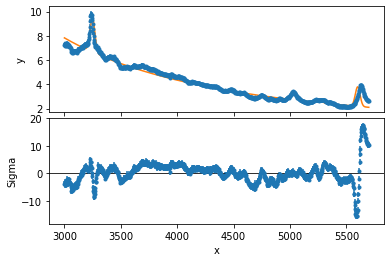

In [5]:
from astropy.io import fits
dat = fits.open('3c273.fits')[1].data
wlen = dat.field('WAVELENGTH')
flux = dat.field('FLUX')
ui.load_arrays(1, wlen, flux)

(ui.get_data().x)
(ui.get_data().y)
#rescaling data
d1 = ui.get_data()
d1.y *= 1e14

d1.staterror == None
True
ui.set_staterror(0.02, fractional=True)
d1.staterror == None
False

#filtering/plotting data
ui.notice(3000, 5700)
ui.plot_data()

#fitting continuum
ui.set_source(ui.powlaw1d.pow1)
pow1.ref = 4000.0
print(pow1)

#checking statistics
ui.get_stat()
ui.get_stat_name()

#plotting fit
ui.fit()
ui.plot_fit()

#viewing results
results = ui.get_fit_results()
print(results)

#adding lines to the fit
#4 gaussians
for n in range(1, 5):
    ui.create_model_component("gauss1d", "g{}".format(n))

ui.set_source(pow1 + g1 + g2 + g3 + g4)
ui.get_source()

#setting starting points for the gaussians
g1.pos = 3250
g2.pos = 5000
g3.pos = 5260
g4.pos = 5600

#shifting starting value
for p in [g1, g2, g3, g4]:
    p.fwhm = 50
    
#plotting gaussian  
ui.fit()
ui.plot_fit_delchi()

#more guassians
ui.gauss1d.g1broad
g1broad.pos = g1.pos
g1broad.fwhm = g1.fwhm * 4
ui.set_source(ui.get_source() + g1broad)


plt.show()

Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 51.7556
Final fit statistic   = 38.8045 at function evaluation 37
Data points           = 91
Degrees of freedom    = 86
Probability [Q-value] = 0.999997
Reduced statistic     = 0.451215
Change in statistic   = 12.9511
   pow1.gamma     1.90087      +/- 0.164288    
   pow1.ampl      4.0954       +/- 0.151723    
   g2.fwhm        73.7743      +/- 2.52347     
   g2.pos         5031.71      +/- 0.929232    
   g2.ampl        0.69471      +/- 0.018849    
0.45121535733679796
pow1.gamma lower bound:	-0.165746
g2.pos lower bound:	-0.937708
pow1.gamma upper bound:	0.165746
g2.ampl lower bound:	-0.0189111
g2.fwhm lower bound:	-2.71108
g2.pos upper bound:	0.937708
g2.ampl upper bound:	0.0189111
pow1.ampl lower bound:	-0.149452
g2.fwhm upper bound:	2.80876
pow1.ampl upper bound:	0.154944
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting M

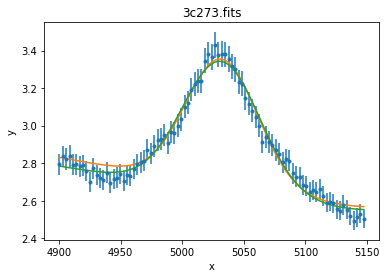

In [2]:
#errors
ui.notice()
ui.notice(4900, 5150)
ui.plot_fit()

ui.freeze(g1, g1broad, g3, g4)
ui.thaw(g2)
ui.fit()
ui.plot_model(overplot=True)

print(ui.get_fit_results().rstat)
ui.conf()

plt.title('3c273.fits')
plt.show()

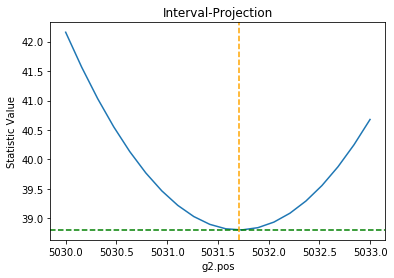

In [3]:
ui.int_proj(g2.pos)
ui.int_proj(g2.pos, min=5030, max=5033)

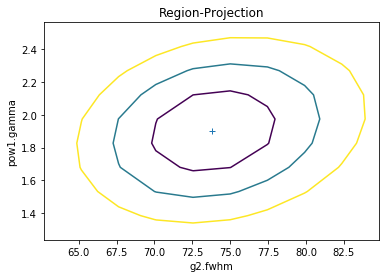

In [4]:
ui.reg_proj(g2.fwhm, pow1.gamma)